In [45]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import glob
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import Imputer, RobustScaler, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score )
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
#import xgboost as xgb
from keras import models, layers, optimizers

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
import shap
#os.chdir("../")
#from scripts.plot_roc import plot_roc_and_pr_curves
#os.chdir("notebooks/")

%matplotlib inline
plt.style.use("fivethirtyeight")
sns.set_context("notebook")

sns.set(palette="Set2")

In [46]:
dfmp = pd.read_csv('votematrix-2017.csv').fillna('')
dfmap = pd.read_csv('mp_mapping.csv').fillna('')

In [47]:
dfmp

,rowid,date,voteno,Bill,mpid41371,mpid41372,mpid41373,mpid41374,mpid41375,mpid41376,...,mpid42720,mpid42721,mpid42723,mpid42724,mpid42725,mpid42726,mpid42727,mpid42728,mpid42729,Unnamed: 1342
0,34477,23/10/2020,155,Prayers - <i> [Mr Speaker in the Chair] </i>,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,
1,34474,21/10/2020,154,Free School Meals,-9,-9,-9,-9,-9,-9,...,4,4,4,4,4,4,2,-9,4,
2,34473,21/10/2020,153,Additional Covid-19 Restrictions: Fair Economi...,-9,-9,-9,-9,-9,-9,...,4,-9,4,4,4,4,2,2,4,
3,34465,21/10/2020,152,Deferred Divisions - Community Infrastructure ...,-9,-9,-9,-9,-9,-9,...,2,-9,2,2,2,2,-9,-9,2,
4,34464,21/10/2020,151,Deferred Divisions - Public Health,-9,-9,-9,-9,-9,-9,...,2,-9,2,2,2,2,-9,-9,2,
5,34463,21/10/2020,150,Deferred Divisions - Public Health,-9,-9,-9,-9,-9,-9,...,2,-9,2,2,2,2,-9,-9,2,
6,34462,21/10/2020,149,Deferred Divisions - Insolvency,-9,-9,-9,-9,-9,-9,...,2,-9,2,2,2,2,-9,-9,2,
7,34461,21/10/2020,148,Deferred Divisions - Exiting the European Unio...,-9,-9,-9,-9,-9,-9,...,2,-9,2,2,2,2,-9,4,2,
8,34457,19/10/2020,147,Immigration and Social Security Co-ordination ...,-9,-9,-9,-9,-9,-9,...,2,2,2,2,2,2,4,4,2,
9,34456,19/10/2020,146,Immigration and Social Security Co-ordination ...,-9,-9,-9,-9,-9,-9,...,2,2,2,2,2,2,4,4,4,


In [48]:
dfmp2 = dfmp.drop(columns=['rowid','date','Bill'],axis=1)

In [49]:
dfmp2T=dfmp2.T.drop(['voteno'],axis=0).drop(columns=[    613],axis=1)

In [50]:
dfmap['name']=dfmap['firstname']+dfmap['surname']

dfmap['mpid']='mpid'
dfmap['mpid']=dfmap['mpid']+dfmap['mlid'].astype(str)

dfmp2T = dfmp2T.join(dfmap.set_index('mpid'))

dfmp2T=dfmp2T.drop(['mlid','firstname','surname','party','PublicWhip URL'],axis=1)


In [51]:
dfmp3=pd.DataFrame(dfmp2T.groupby(['name']).sum())

In [52]:
dfmp3=dfmp3.replace(-18.0,-9.0)
dfmp3=dfmp3.replace(-8.0,1.0)
dfmp3=dfmp3.replace(-7.0,2.0)
dfmp3=dfmp3.replace(-5.0,4.0)
dfmp3=dfmp3.replace(-4.0,5.0)

In [109]:
dfmp4=dfmp3
dfmp4=dfmp4.replace(2,1)
dfmp4=dfmp4.replace(4,0)
dfmp4=dfmp4.replace(5,0)
dfmp4=dfmp4.replace(-9,0.5)

In [110]:
dfmp5 = dfmp4.apply(pd.to_numeric).fillna(0)

In [111]:
dfmp5

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
name,,,,,,,,,,,,,,,,,,,,,
AaronBell,0.5,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
AbenaOppong-Asare,0.5,1.0,1.0,0.0,0.5,0.5,0.5,0.0,0.0,0.0,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
AdamAfriyie,0.5,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
AdamHolloway,0.5,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
AdrianBailey,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
AfzalKhan,0.5,1.0,1.0,0.0,0.5,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,1.0,0.5,1.0,1.0,1.0,0.0,0.5,1.0
AlanBrown,0.5,1.0,1.0,0.5,0.5,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
AlanCampbell,0.5,1.0,1.0,0.0,0.5,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.5,1.0
AlanDuncan,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


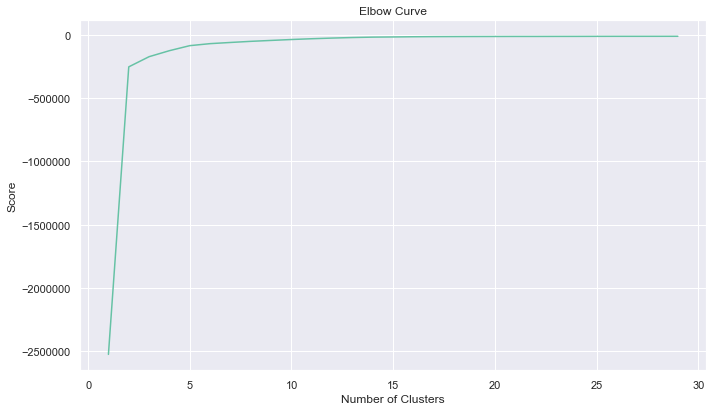

In [112]:
from sklearn.cluster import KMeans

n_cluster = range(1,30)
kmeans = [KMeans(n_clusters=i).fit(dfmp5) for i in n_cluster]
scores = [kmeans[i].score(dfmp5) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

In [113]:
X = dfmp5
km = KMeans(n_clusters=5)
km.fit(X)
X['cluster']=km.predict(X)

In [114]:
temp=X['cluster']
temp=pd.DataFrame(temp)

In [115]:
temp['name']=temp.index

In [116]:
temp2 = temp.join(dfmap.set_index('name')).drop(columns=['mlid','mpid','PublicWhip URL','surname','firstname']).drop_duplicates()

Cluster 0


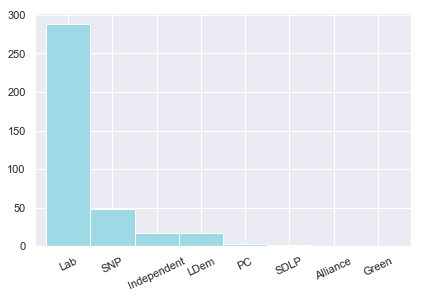

Cluster 1


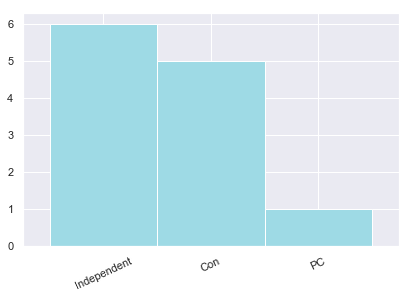

Cluster 2


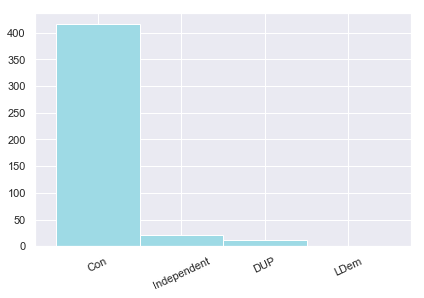

Cluster 3


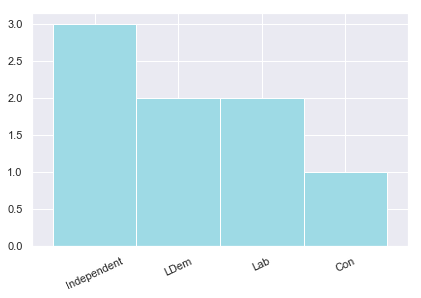

Cluster 4


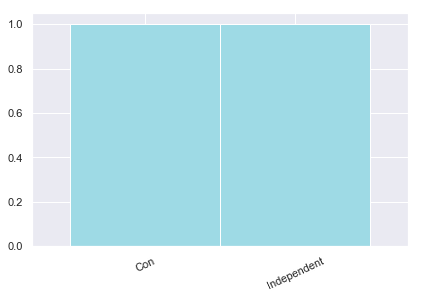

In [142]:
for i in range (0,5):
    print('Cluster '+str(i))
    temp2[temp2['cluster']==i]['party'].value_counts().plot(kind='bar',width=1,cmap='tab20_r')
    plt.xticks(rotation=25)
    plt.show()

In [146]:
for i in range(0,5):
    print(temp2[temp2['cluster']==i][['party','cluster']].sort_values('party'))

                          party  cluster
name                                    
StephenFarry           Alliance        0
CarolineLucas             Green        0
NealeHanvey         Independent        0
StephenLloyd        Independent        0
SylviaHermon        Independent        0
AnnCoffey           Independent        0
GavinShuker         Independent        0
KelvinHopkins       Independent        0
AngelaSmith         Independent        0
IvanLewis           Independent        0
FrankField          Independent        0
MikeGapes           Independent        0
JoanRyan            Independent        0
JaredO&#39;Mara     Independent        0
LucianaBerger       Independent        0
FionaOnasanya       Independent        0
ChrisLeslie         Independent        0
JohnWoodcock        Independent        0
IanAustin           Independent        0
LaylaMoran                 LDem        0
ChristineJardine           LDem        0
WeraHobhouse               LDem        0
WendyChamberlain